<h1> DS200A Computer Vision Assignment</h1>

<h2>  Part Two: Exploratory data analysis and feature extraction. </h2>	


<h5> In this section, Compute at least 15 such image features (a method for each), including the following (NOTE: At least 10 of these must be scalar features and 2 matrix-based features): (i) image size, (ii) average of the red-channel intensity, (iii) aspectratio. This will require significant explatoratory research and data analysis. The first one is already implemented for you, and the next two are pre-specified. Additional requirements specfied in pdf. </h5>

In [1]:
%store -r train
%store -r test

In [2]:
pip install numpy matplotlib pandas scikit-image opencv-python==3.4.2.16  opencv-contrib-python==3.4.2.16

Note: you may need to restart the kernel to use updated packages.


In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
from numpy.linalg import matrix_rank
import numpy as np
import cv2
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

In [4]:
# Returns the pixel size of the image
def ft0(image):
    return [image.size]

#Returns the aspect ratio of the image
def ft1(image):
    return [image.shape[0] / image.shape[1]]

def resize(image):
    return cv2.resize(image, (400, 340))

# Returns the average of the red-channel intensity for the images
def ft2(image):
    return [np.mean(image, axis=(0, 1))[2]]

# Returns the average of the green-channel intensity for the images
def ft3(image):
    return [np.mean(image, axis=(0, 1))[0]]

# Returns the average of the blue-channel intensity for the images
def ft4(image):
    return [np.mean(image, axis=(0, 1))[1]]

def ft5(image):
    return [np.std(image, axis=(0,1))[0]]
def ft6(image):
    return [np.std(image, axis=(0,1))[1]]
def ft7(image):
    return [np.std(image, axis=(0,1))[2]]
    
# Returns the cornerHarris proportion
def ft8(image):
    gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    gray = np.float32(gray)
    dst = cv2.cornerHarris(gray,2,3,0.04)
    return [(dst>0.01 * dst.max()).sum() / dst.size]

# Returns the cornerHarris rank divided by max possible rank
def ft9(image):
    gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    gray = np.float32(gray)
    dst = cv2.cornerHarris(gray,2,3,0.04)
    return [matrix_rank(dst) / min(dst.shape)]

def ft10(image):
    hist = cv2.calcHist([image], [0], None, [16], [0,255])
    return (hist / 255).flatten()

def ft11(image):
    hist = cv2.calcHist([image], [1], None, [16], [0,255])
    return (hist / 255).flatten()

def ft12(image):
    hist = cv2.calcHist([image], [2], None, [16], [0,255])
    return (hist / 255).flatten()

def ft13(image):
    hist = cv2.calcHist([image], [0], None, [16], [0,255])
    return [(hist / 255).std()]

def ft14(image):
    hist = cv2.calcHist([image], [1], None, [16], [0,255])
    return [(hist / 255).std()]

def ft15(image):
    hist = cv2.calcHist([image], [2], None, [16], [0,255])
    return [(hist / 255).std()]

 We expect all external sources sited, and significant indication of EDA. 

<h4> Graphs </h4>

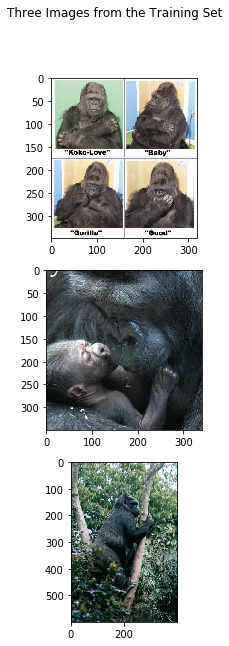

In [5]:
plt.figure(figsize=(10,10))
plt.subplot(3,1,1)
plt.imshow(cv2.cvtColor(train['Pictures'][0], cv2.COLOR_BGR2RGB))
plt.subplot(3,1,2)
plt.imshow(cv2.cvtColor(train['Pictures'][1], cv2.COLOR_BGR2RGB))
plt.subplot(3,1,3)
plt.imshow(cv2.cvtColor(train['Pictures'][2], cv2.COLOR_BGR2RGB))
plt.suptitle("Three Images from the Training Set")
plt.show()

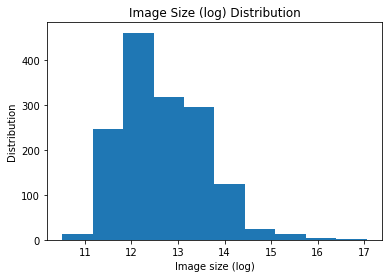

In [6]:
size = map(lambda x: np.log(x.size), train['Pictures'])
plt.hist(list(size))
plt.xlabel("Image size (log)")
plt.ylabel("Distribution")
plt.title("Image Size (log) Distribution")
plt.show()

In [7]:
# pixel intensities
from collections import Counter
flat_pic = []
count = Counter([])
for pic in train["Pictures"]:
    flat_pic = [one for three in pic for two in three for one in two]
    count += Counter(flat_pic)
keys = []
for key in count.keys():
    keys.append(key)
keys.sort()
vals = []
for key in keys:
    vals.append(count[key])

Text(0, 0.5, 'count')

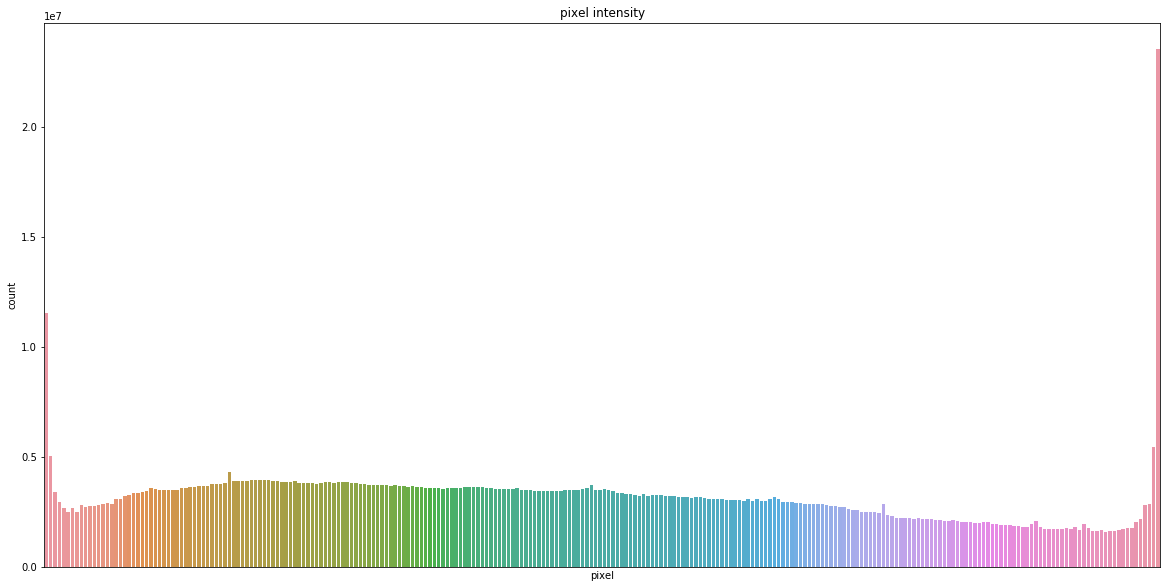

In [8]:
plt.figure(figsize=(20,10))
pixel_intensity = sns.barplot(keys, vals)
pixel_intensity.set_xticks([])
plt.title("pixel intensity")
plt.xlabel("pixel")
plt.ylabel("count")

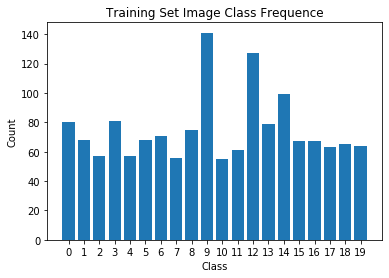

In [9]:
group_count = train.groupby("Encoding").size()
plt.bar(group_count.index, group_count.values)
plt.xticks(np.arange(20))
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Training Set Image Class Frequence")
plt.show()

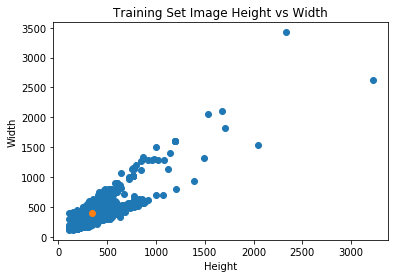

In [10]:
shape = np.array(list(map(lambda x: x.shape[0:2], train['Pictures'])))
plt.scatter(shape[:,0], shape[:,1])
plt.scatter(np.mean(shape[:,0]), np.mean(shape[:,1]))
plt.xlabel("Height")
plt.ylabel("Width")
plt.title("Training Set Image Height vs Width")
plt.show()

Text(0, 0.5, 'channel intensity')

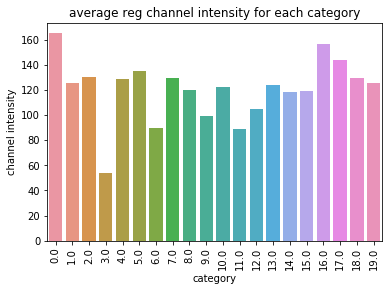

In [11]:
red_avg = []
for image in train['Pictures']:
    red_avg.append(np.mean(image, axis=(0, 1))[2])
    
red_avg = pd.Series(red_avg)
encoding = train["Encoding"]

frame = { 'red_avg': red_avg, 'encoding': encoding } 
result = pd.DataFrame(frame) 
result = result.groupby("encoding").mean()
result = result.reset_index()
sns.barplot(x="encoding", y="red_avg", data=result)
plt.xticks(rotation=90)
plt.title("average reg channel intensity for each category")
plt.xlabel("category")
plt.ylabel("channel intensity")

Text(0, 0.5, 'channel intensity')

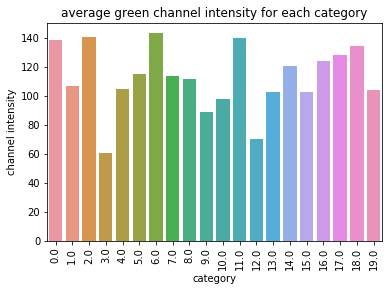

In [12]:
green_avg = []
for image in train['Pictures']:
    green_avg.append(np.mean(image, axis=(0, 1))[0])
    
green_avg = pd.Series(green_avg)
encoding = train["Encoding"]

frame = { 'green_avg': green_avg, 'encoding': encoding } 
result = pd.DataFrame(frame) 
result = result.groupby("encoding").mean()
result = result.reset_index()
sns.barplot(x="encoding", y="green_avg", data=result)
plt.xticks(rotation=90)
plt.title("average green channel intensity for each category")
plt.xlabel("category")
plt.ylabel("channel intensity")

Text(0, 0.5, 'channel intensity')

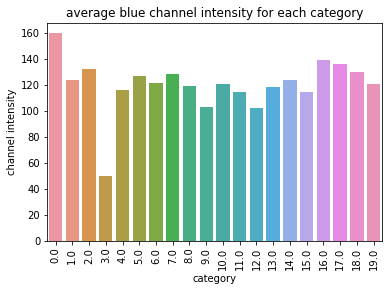

In [13]:
blue_avg = []
for image in train['Pictures']:
    blue_avg.append(np.mean(image, axis=(0, 1))[1])
    
blue_avg = pd.Series(blue_avg)
encoding = train["Encoding"]

frame = { 'blue_avg': blue_avg, 'encoding': encoding } 
result = pd.DataFrame(frame) 
result = result.groupby("encoding").mean()
result = result.reset_index()
sns.barplot(x="encoding", y="blue_avg", data=result)
plt.xticks(rotation=90)
plt.title("average blue channel intensity for each category")
plt.xlabel("category")
plt.ylabel("channel intensity")

<h4> Sources </h4>

pixel intensity: https://homepages.inf.ed.ac.uk/rbf/HIPR2/histgram.htm

harris-corners: https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_feature2d/py_features_harris/py_features_harris.html#harris-corners

SIFT: https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_feature2d/py_sift_intro/py_sift_intro.html#sift-intro

bag of words: https://github.com/bikz05/bag-of-words

<h4> DataFrame Creation </h4>

In [14]:
from scipy.cluster.vq import kmeans, vq

def feature_frame(df):
    X = pd.DataFrame()
    pictures = df['Pictures']
    for idx, img in enumerate(pictures):
        if idx % 100 == 0:
            print(idx)
        row = []
        row.extend(ft0(img))
        row.extend(ft1(img))
        img = resize(img)
        row.extend(ft2(img))
        row.extend(ft3(img))
        row.extend(ft4(img))
        row.extend(ft5(img))
        row.extend(ft6(img))
        row.extend(ft7(img))
        row.extend(ft8(img))
        row.extend(ft9(img))
        row.extend(ft10(img))
        row.extend(ft11(img))
        row.extend(ft12(img))
        row.extend(ft13(img))
        row.extend(ft14(img))
        row.extend(ft15(img))
        
        series = pd.Series(row)
        X = X.append(series, ignore_index=True)
    
    return X

codebook = None
k = 100

def generate_dict(train):
    global codebook
    global k
    pictures = train['Pictures']
    desc_list = []
        
    sift = cv2.xfeatures2d.SIFT_create(nfeatures=200)
    
    for idx, img in enumerate(pictures):
        if idx % 100 == 0:
            print(idx)
        kps, descs = sift.detectAndCompute(img, None)
        if len(kps) == 0:
            descs = np.zeros((1, 128))
        descs = np.float32(descs)
        desc_list.append(descs)
    
    print('start vstack')
    descriptors = np.vstack(desc_list)
    print(descriptors.shape)
    print('start kmeans')
    codebook, variance = kmeans(descriptors, k, 1)
    return desc_list
    
def bag_of_word(df, desc_list=None):
    global codebook
    global k
    im_features = np.zeros((df.shape[0], k))
    pictures = df['Pictures']
    if desc_list is None:
        desc_list = []    
        sift = cv2.xfeatures2d.SIFT_create(nfeatures=200)
    
        for idx, img in enumerate(pictures):
            if idx % 100 == 0:
                print(idx)
            kps, descs = sift.detectAndCompute(img, None)
            if len(kps) == 0:
                descs = np.zeros((1, 128))
            descs = np.float32(descs)
            desc_list.append(descs)
    else:
        pass
        
    for i in range(df.shape[0]):
        words, distance = vq(desc_list[i], codebook)
        for w in words:
            im_features[i][w] += 1

    return pd.DataFrame(im_features)

In [15]:
desc_list = generate_dict(train)
X_train_1 = bag_of_word(train, desc_list)
X_train_2 = feature_frame(train)
X_train = pd.concat([X_train_1, X_train_2], axis=1)
y_train = train['Encoding']

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
start vstack
(278409, 128)
start kmeans
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500


In [16]:
%store X_train
%store y_train

Stored 'X_train' (DataFrame)
Stored 'y_train' (Series)


In [17]:
X_vali_1 = bag_of_word(test)
X_vali_2 = feature_frame(test)
X_vali = pd.concat([X_vali_1, X_vali_2], axis=1)

0
100
200
300
400
500
600
700
0
100
200
300
400
500
600
700


In [18]:
%store X_vali

Stored 'X_vali' (DataFrame)
